In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

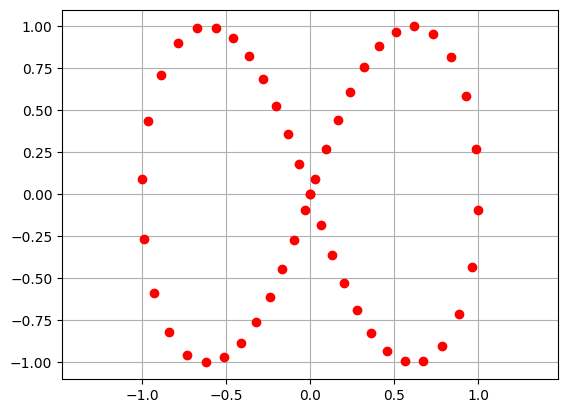

In [41]:
def lemniscate(center_x: float, center_y: float, width: float, height: float, alpha_deg: float, direction: int, percent : float):
    """
        Parameters
         - Center - x,y
         - width, height
         - angle
         - direction (-1,1)
         - idx
         - npoints
    """
    t = ((np.pi*2*percent)+direction*np.pi/2.0)
    
    alpha_rad = alpha_deg*np.pi/180.0
    s = (1.0/0.3535527625463974)
    x_0 = (width*np.cos(t)/(1+np.sin(t)**2.0))
    y_0 = -(s*height*np.cos(t)*np.sin(t))/(1+np.sin(t)**2.0)
    x = center_x + x_0*np.cos(alpha_rad) - y_0*np.sin(alpha_rad)
    y = center_y + x_0*np.sin(alpha_rad) + y_0*np.cos(alpha_rad)
    return x,y

center_x = 0
center_y = 0
width = 1

height = 1
n_points = 50
alpha_deg = 0
direction = 1
xs = []
ys = []
for i in np.linspace(0,1,n_points):
    #xs, ys = lemniscate_proto(a,b,n_points)
    x,y = lemniscate(center_x,center_y,width,height,alpha_deg,direction,i)
    xs.append(x)
    ys.append(y)
    
plt.plot(xs, ys, 'ro')

# Set equal aspect ratio
plt.axis('equal')

# Enable grid
plt.grid(True)

# Show the plot
plt.show()
# Cycle through different combinations of paraemters and plot them

# First we are going to test the functions, and find the offsetting constant

In [44]:
# Function to update plot
def update_plot(center_x=0, center_y=0, width=1, height=1, alpha_deg=0, n_points=50, percent=1.0):
    xs = []
    ys = []
    direction = -1
    for i in np.linspace(0, percent, n_points):
        x, y = lemniscate(center_x, center_y, width, height, alpha_deg, direction, i)
        xs.append(x)
        ys.append(y)
    
    plt.figure()
    plt.plot(xs, ys, 'ro')
    plt.axis('equal')
    plt.grid(True)
    plt.xlim([-20,20])
    plt.ylim([-20,20])
    plt.show()

# Create interactive sliders
center_x_slider = widgets.FloatSlider(value=0, min=-5, max=10, step=0.1, description='Center X:')
center_y_slider = widgets.FloatSlider(value=0, min=-5, max=10, step=0.1, description='Center Y:')
width_slider = widgets.FloatSlider(value=10, min=0.1, max=20, step=0.1, description='Width:')
height_slider = widgets.FloatSlider(value=10, min=0.1, max=20, step=0.1, description='Height:')
alpha_deg_slider = widgets.FloatSlider(value=0, min=-180, max=180, step=1, description='Alpha (deg):')
n_points_slider = widgets.IntSlider(value=1, min=0, max=200, step=1, description='N Points:')
percent_slider = widgets.FloatSlider(value=1, min=0, max=1, step=0.1, description='Percent display:')

# Use `widgets.interactive` to update the plot with slider values
interactive_plot = widgets.interactive(update_plot, 
                                       center_x=center_x_slider, 
                                       center_y=center_y_slider,
                                       width=width_slider, 
                                       height=height_slider, 
                                       alpha_deg=alpha_deg_slider,
                                       percent=percent_slider)

# Display the sliders and the plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='Center X:', max=10.0, min=-5.0), FloatSlider(value=0…